In [1]:
import torch
import numpy as np
import uncertainty_toolbox as uct
import uncertainty_toolbox.metrics as umetrics
from uncertainty_toolbox.metrics_calibration import (
    get_proportion_lists_vectorized,
)
import uncertainty_toolbox.viz as uviz
from uncertainty_toolbox.recalibration import iso_recal

from data import data_preprocess
from evaluation import metrics
from model import end2end_kernel

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('crimes')

In [3]:
end2end_model = end2end_kernel.train_model_kernel(x_train, y_train, n_epoch = 500, num_models = 5, hidden_layers = [50, 50], learning_rate = 0.0012, tanh = True, calibration_threshold = .03, exp_decay = .998)

initial loss:  6.318404674530029
cal loss:  0.36827221512794495 cal error: 0.5412008888888888 nllk loss:  tensor(-0.2481, grad_fn=<MeanBackward0>) kernel loss: tensor(2.1888, grad_fn=<MeanBackward0>)
cal loss:  0.6117395162582397 cal error: 0.4890564444444444 nllk loss:  tensor(-0.3503, grad_fn=<MeanBackward0>) kernel loss: tensor(1.5182, grad_fn=<MeanBackward0>)
cal loss:  0.474984347820282 cal error: 0.42779422222222224 nllk loss:  tensor(-0.4659, grad_fn=<MeanBackward0>) kernel loss: tensor(1.1093, grad_fn=<MeanBackward0>)
cal loss:  0.6375291347503662 cal error: 0.38848133333333335 nllk loss:  tensor(-0.5996, grad_fn=<MeanBackward0>) kernel loss: tensor(0.8739, grad_fn=<MeanBackward0>)
cal loss:  0.848148763179779 cal error: 0.36312399999999995 nllk loss:  tensor(-0.7270, grad_fn=<MeanBackward0>) kernel loss: tensor(0.9099, grad_fn=<MeanBackward0>)
cal loss:  0.4384017884731293 cal error: 0.3347097777777777 nllk loss:  tensor(-0.8631, grad_fn=<MeanBackward0>) kernel loss: tensor(0.

cal loss:  0.041690658777952194 cal error: 0.0921124444444444 nllk loss:  tensor(-3.4456, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2713, grad_fn=<MeanBackward0>)
cal loss:  0.019629666581749916 cal error: 0.046266666666666685 nllk loss:  tensor(-3.4211, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2645, grad_fn=<MeanBackward0>)
cal loss:  0.0390317440032959 cal error: 0.16093733333333327 nllk loss:  tensor(-3.3952, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3156, grad_fn=<MeanBackward0>)
cal loss:  0.03788206726312637 cal error: 0.08260622222222225 nllk loss:  tensor(-3.3783, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2478, grad_fn=<MeanBackward0>)
cal loss:  0.02660292387008667 cal error: 0.14945377777777777 nllk loss:  tensor(-3.4143, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2849, grad_fn=<MeanBackward0>)
cal loss:  0.023187845945358276 cal error: 0.0663648888888889 nllk loss:  tensor(-3.4245, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2648, grad_fn=<MeanBac

cal loss:  0.01455632597208023 cal error: 0.04790755555555558 nllk loss:  tensor(-3.6691, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2058, grad_fn=<MeanBackward0>)
cal loss:  0.031152527779340744 cal error: 0.11683999999999996 nllk loss:  tensor(-3.6680, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2620, grad_fn=<MeanBackward0>)
cal loss:  0.02617926336824894 cal error: 0.038190222222222237 nllk loss:  tensor(-3.7150, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2417, grad_fn=<MeanBackward0>)
cal loss:  0.012848720885813236 cal error: 0.09502311111111111 nllk loss:  tensor(-3.7314, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2040, grad_fn=<MeanBackward0>)
cal loss:  0.029056435450911522 cal error: 0.03038044444444446 nllk loss:  tensor(-3.7181, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2310, grad_fn=<MeanBackward0>)
cal loss:  0.02299414575099945 cal error: 0.11582222222222219 nllk loss:  tensor(-3.7167, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2306, grad_fn=<Mean

cal loss:  0.030570993199944496 cal error: 0.11051866666666663 nllk loss:  tensor(-3.8261, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1974, grad_fn=<MeanBackward0>)
cal loss:  0.014247654937207699 cal error: 0.043850666666666684 nllk loss:  tensor(-3.8395, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2044, grad_fn=<MeanBackward0>)
cal loss:  0.037818893790245056 cal error: 0.09557911111111107 nllk loss:  tensor(-3.8630, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1924, grad_fn=<MeanBackward0>)
cal loss:  0.021371545270085335 cal error: 0.031452444444444456 nllk loss:  tensor(-3.8708, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1735, grad_fn=<MeanBackward0>)
cal loss:  0.014700925908982754 cal error: 0.0983284444444444 nllk loss:  tensor(-3.8541, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1916, grad_fn=<MeanBackward0>)
cal loss:  0.017223970964550972 cal error: 0.03826044444444446 nllk loss:  tensor(-3.8529, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1774, grad_fn=<M

cal loss:  0.014424636960029602 cal error: 0.02230488888888889 nllk loss:  tensor(-4.0086, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2003, grad_fn=<MeanBackward0>)
cal loss:  0.009780162014067173 cal error: 0.0790066666666666 nllk loss:  tensor(-4.0077, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1505, grad_fn=<MeanBackward0>)
cal loss:  0.013181236572563648 cal error: 0.025959111111111127 nllk loss:  tensor(-4.0044, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1865, grad_fn=<MeanBackward0>)
cal loss:  0.023300906643271446 cal error: 0.08811688888888883 nllk loss:  tensor(-4.0010, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1863, grad_fn=<MeanBackward0>)
cal loss:  0.014980476349592209 cal error: 0.031663555555555584 nllk loss:  tensor(-3.9924, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1688, grad_fn=<MeanBackward0>)
cal loss:  0.01736965775489807 cal error: 0.09260133333333329 nllk loss:  tensor(-3.9918, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1697, grad_fn=<Me

cal loss:  0.009828193113207817 cal error: 0.07323199999999999 nllk loss:  tensor(-4.1087, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1688, grad_fn=<MeanBackward0>)
cal loss:  0.01078400295227766 cal error: 0.028236888888888922 nllk loss:  tensor(-4.1062, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1536, grad_fn=<MeanBackward0>)
cal loss:  0.01638457551598549 cal error: 0.08325911111111106 nllk loss:  tensor(-4.1014, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1954, grad_fn=<MeanBackward0>)
cal loss:  0.014117468148469925 cal error: 0.03320088888888891 nllk loss:  tensor(-4.0999, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1451, grad_fn=<MeanBackward0>)
cal loss:  0.022954175248742104 cal error: 0.08814444444444441 nllk loss:  tensor(-4.0987, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1708, grad_fn=<MeanBackward0>)
cal loss:  0.01605135016143322 cal error: 0.03289644444444445 nllk loss:  tensor(-4.1025, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1243, grad_fn=<Mean

cal loss:  0.030924953520298004 cal error: 0.03084666666666668 nllk loss:  tensor(-4.1990, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1561, grad_fn=<MeanBackward0>)
cal loss:  0.016117708757519722 cal error: 0.07388622222222219 nllk loss:  tensor(-4.2004, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1444, grad_fn=<MeanBackward0>)
cal loss:  0.01979185827076435 cal error: 0.023464444444444458 nllk loss:  tensor(-4.2185, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1560, grad_fn=<MeanBackward0>)
cal loss:  0.010891309939324856 cal error: 0.06529244444444443 nllk loss:  tensor(-4.2212, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1630, grad_fn=<MeanBackward0>)
cal loss:  0.023020168766379356 cal error: 0.02749244444444446 nllk loss:  tensor(-4.2087, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1567, grad_fn=<MeanBackward0>)
cal loss:  0.015834864228963852 cal error: 0.07861555555555551 nllk loss:  tensor(-4.2041, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1538, grad_fn=<Me

cal loss:  0.010208779014647007 cal error: 0.06321644444444444 nllk loss:  tensor(-4.3001, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1590, grad_fn=<MeanBackward0>)
cal loss:  0.018862424418330193 cal error: 0.026165777777777788 nllk loss:  tensor(-4.2939, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1321, grad_fn=<MeanBackward0>)
cal loss:  0.007769360672682524 cal error: 0.07379288888888887 nllk loss:  tensor(-4.2762, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1544, grad_fn=<MeanBackward0>)
cal loss:  0.005279395263642073 cal error: 0.031270222222222255 nllk loss:  tensor(-4.2871, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1496, grad_fn=<MeanBackward0>)
cal loss:  0.015919016674160957 cal error: 0.06280933333333333 nllk loss:  tensor(-4.2990, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1708, grad_fn=<MeanBackward0>)
cal loss:  0.009975060820579529 cal error: 0.02177822222222224 nllk loss:  tensor(-4.3192, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1476, grad_fn=<

cal loss:  0.012387260794639587 cal error: 0.02398444444444446 nllk loss:  tensor(-4.3824, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1354, grad_fn=<MeanBackward0>)
cal loss:  0.018712511286139488 cal error: 0.06051866666666666 nllk loss:  tensor(-4.3706, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1437, grad_fn=<MeanBackward0>)
cal loss:  0.012465808540582657 cal error: 0.027514222222222235 nllk loss:  tensor(-4.3744, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1610, grad_fn=<MeanBackward0>)
cal loss:  0.008674896322190762 cal error: 0.06293466666666665 nllk loss:  tensor(-4.3592, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1490, grad_fn=<MeanBackward0>)
cal loss:  0.010543519631028175 cal error: 0.024604888888888916 nllk loss:  tensor(-4.3854, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1297, grad_fn=<MeanBackward0>)
cal loss:  0.015452343039214611 cal error: 0.05776711111111111 nllk loss:  tensor(-4.3877, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1337, grad_fn=<

cal loss:  0.008165178820490837 cal error: 0.05152266666666664 nllk loss:  tensor(-4.4555, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1515, grad_fn=<MeanBackward0>)
cal loss:  0.03324754908680916 cal error: 0.021721777777777805 nllk loss:  tensor(-4.4699, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1341, grad_fn=<MeanBackward0>)
cal loss:  0.014960601925849915 cal error: 0.05035377777777774 nllk loss:  tensor(-4.4646, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1285, grad_fn=<MeanBackward0>)
cal loss:  0.010393701493740082 cal error: 0.0240066666666667 nllk loss:  tensor(-4.4676, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1278, grad_fn=<MeanBackward0>)
cal loss:  0.015426438301801682 cal error: 0.053248444444444404 nllk loss:  tensor(-4.4642, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1271, grad_fn=<MeanBackward0>)
cal loss:  0.008328262716531754 cal error: 0.02191955555555558 nllk loss:  tensor(-4.4734, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1249, grad_fn=<Me

cal loss:  0.007977303117513657 cal error: 0.02725822222222225 nllk loss:  tensor(-4.5254, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1310, grad_fn=<MeanBackward0>)
cal loss:  0.01066971942782402 cal error: 0.05412222222222219 nllk loss:  tensor(-4.5228, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1332, grad_fn=<MeanBackward0>)
cal loss:  0.013492791913449764 cal error: 0.026951111111111134 nllk loss:  tensor(-4.5362, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1338, grad_fn=<MeanBackward0>)
cal loss:  0.01671411655843258 cal error: 0.0449191111111111 nllk loss:  tensor(-4.5309, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1313, grad_fn=<MeanBackward0>)
cal loss:  0.01566438004374504 cal error: 0.022310222222222235 nllk loss:  tensor(-4.5423, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1641, grad_fn=<MeanBackward0>)
cal loss:  0.008175060153007507 cal error: 0.044592444444444435 nllk loss:  tensor(-4.5309, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1276, grad_fn=<Mea

End2end test MAPE:  0.61222315
End2end test RMSE:  0.12985341
End2end test NLLK:  -1.4911262
End2end test CRPS:  tensor(0.0634)


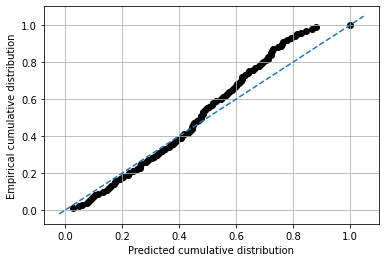

End2end test calibration error when step size is 0.001:  5.147260459824975
End2end test calibration error when step size is 0.01:  0.5102779069241185
End2end test calibration error when step size is 0.1:  0.042998942600051854


In [5]:
mean_pred, var_pred, _ = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = var_pred.detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [6]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.76it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.19it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 10.51it/s]

 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.085
  RMSE          0.130
  MDAE          0.053
  MARPD         45.823
  R2            0.661
  Correlation   0.819
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.121
  Mean-absolute Calibration Error       0.111
  Miscalibration Area                   0.112
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.167
     Group Size: 0.56 -- Calibration Error: 0.129
     Group Size: 1.00 -- Calibration Error: 0.111
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.186
     Group Size: 0.56 -- Calibration Error: 0.146
     Group Size: 1.00 -- Calibration Error: 0.121
===============

Lims is None. Setting lims now:
min_max_true: (0.0, 1.0)
min_max_pred: (0.010060996, 0.9065423)
lims: (0.0, 1.0)
lims_ext: (-0.1, 1.1)


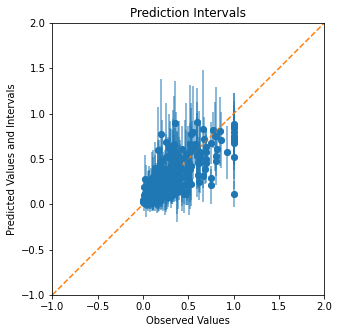

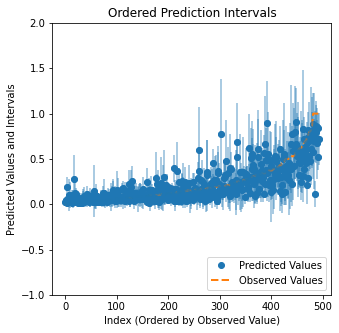

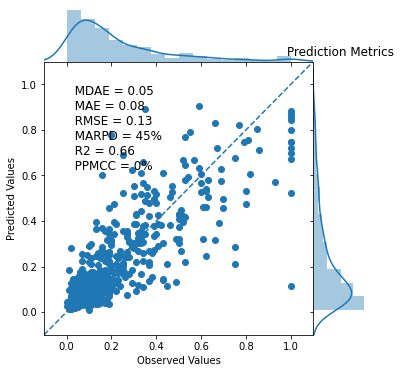

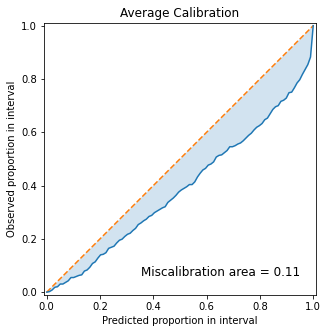

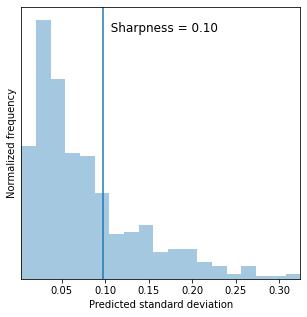

In [7]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))